In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
%matplotlib inline

from net import DenseUNet
from config import cfg

In [77]:
cfg.epochs = 100
cfg.display_period = 10
cfg.batch_size = 16
cfg.load_model = True
cfg.reg_weight = .0008
cfg.sem_seg_weight = .002
cfg.dir_seg_weight = .002
cfg.learning_rate = 0.00003
cfg.class_balance = 0.3

tf.reset_default_graph()
model = DenseUNet(cfg)
model.train()

Size of training set :  20160
Size of validation set :  2520
Loading model...
INFO:tensorflow:Restoring parameters from ./models/model-75499
Classification loss after 10 batches : 0.00028
Regression loss after 10 batches : 0.00027
Segmentation loss after 10 batches : 0.00028
Classification loss after 20 batches : 0.00047
Regression loss after 20 batches : 0.00026
Segmentation loss after 20 batches : 0.00029
Classification loss after 30 batches : 0.00034
Regression loss after 30 batches : 0.00026
Segmentation loss after 30 batches : 0.00029
Classification loss after 40 batches : 0.00035
Regression loss after 40 batches : 0.00028
Segmentation loss after 40 batches : 0.00029
Classification loss after 50 batches : 0.00052
Regression loss after 50 batches : 0.00027
Segmentation loss after 50 batches : 0.00030
Classification loss after 60 batches : 0.00040
Regression loss after 60 batches : 0.00024
Segmentation loss after 60 batches : 0.00028
Classification loss after 70 batches : 0.00051
Re

Classification loss after 600 batches : 0.00044
Regression loss after 600 batches : 0.00024
Segmentation loss after 600 batches : 0.00031
Classification loss after 610 batches : 0.00042
Regression loss after 610 batches : 0.00025
Segmentation loss after 610 batches : 0.00029
Classification loss after 620 batches : 0.00037
Regression loss after 620 batches : 0.00027
Segmentation loss after 620 batches : 0.00028
Classification loss after 630 batches : 0.00028
Regression loss after 630 batches : 0.00026
Segmentation loss after 630 batches : 0.00031
Classification loss after 640 batches : 0.00042
Regression loss after 640 batches : 0.00028
Segmentation loss after 640 batches : 0.00032
Classification loss after 650 batches : 0.00046
Regression loss after 650 batches : 0.00025
Segmentation loss after 650 batches : 0.00030
Classification loss after 660 batches : 0.00052
Regression loss after 660 batches : 0.00026
Segmentation loss after 660 batches : 0.00029
Classification loss after 670 batc

Classification loss after 1190 batches : 0.00037
Regression loss after 1190 batches : 0.00026
Segmentation loss after 1190 batches : 0.00032
Classification loss after 1200 batches : 0.00031
Regression loss after 1200 batches : 0.00027
Segmentation loss after 1200 batches : 0.00029
Classification loss after 1210 batches : 0.00040
Regression loss after 1210 batches : 0.00029
Segmentation loss after 1210 batches : 0.00032
Classification loss after 1220 batches : 0.00045
Regression loss after 1220 batches : 0.00026
Segmentation loss after 1220 batches : 0.00030
Classification loss after 1230 batches : 0.00052
Regression loss after 1230 batches : 0.00027
Segmentation loss after 1230 batches : 0.00032
Classification loss after 1240 batches : 0.00045
Regression loss after 1240 batches : 0.00026
Segmentation loss after 1240 batches : 0.00029
Classification loss after 1250 batches : 0.00042
Regression loss after 1250 batches : 0.00028
Segmentation loss after 1250 batches : 0.00030
Classificatio

Classification loss after 1770 batches : 0.00037
Regression loss after 1770 batches : 0.00028
Segmentation loss after 1770 batches : 0.00030
Classification loss after 1780 batches : 0.00032
Regression loss after 1780 batches : 0.00025
Segmentation loss after 1780 batches : 0.00028
Classification loss after 1790 batches : 0.00054
Regression loss after 1790 batches : 0.00025
Segmentation loss after 1790 batches : 0.00032
Classification loss after 1800 batches : 0.00032
Regression loss after 1800 batches : 0.00026
Segmentation loss after 1800 batches : 0.00027
Classification loss after 1810 batches : 0.00028
Regression loss after 1810 batches : 0.00026
Segmentation loss after 1810 batches : 0.00029
Classification loss after 1820 batches : 0.00031
Regression loss after 1820 batches : 0.00028
Segmentation loss after 1820 batches : 0.00033
Classification loss after 1830 batches : 0.00049
Regression loss after 1830 batches : 0.00025
Segmentation loss after 1830 batches : 0.00031
Classificatio

KeyboardInterrupt: 

In [2]:
cfg.epochs = 100
cfg.display_period = 10
cfg.batch_size = 16

In [117]:
img = np.load('/media/storage/Kaggle/train/data_1/val/039_095.npz')['image']
tf.reset_default_graph()
model = DenseUNet(cfg)
bboxes, probs, mask_probs = model.test(img)

Size of training set :  20160
Size of validation set :  2520
Loading model...
INFO:tensorflow:Restoring parameters from ./models/model-77499


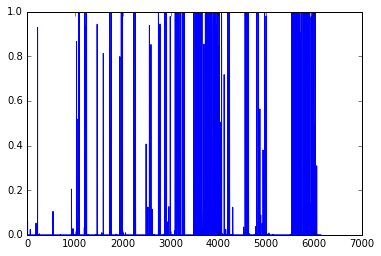

In [88]:
plt.plot(probs[2][:, 1])

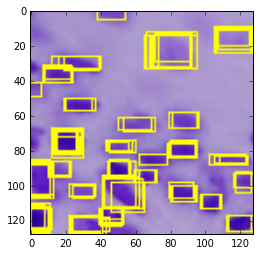

In [125]:
img = np.load('/media/storage/Kaggle/train/data_1/val/039_095.npz')['image']
i_layer = 2
for prob, (y, x, h, w) in zip(probs[i_layer], bboxes[i_layer]):
    if prob[1] > .5:
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (1., 1., 0., 1), 1)
plt.imshow(img)

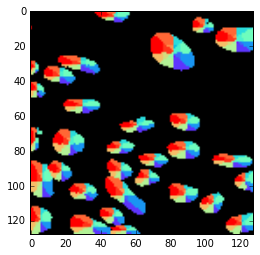

In [124]:
img_mask = np.zeros_like(img)
colors = cm.rainbow(np.linspace(0, 1, 16))
mask_probs = np.squeeze(mask_probs)

for i, c in enumerate(colors):
    roi = np.where(mask_probs[:,:,i+1] > .1)
    img_mask[roi] = c[:3]
plt.imshow(img_mask)

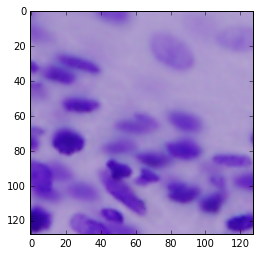

In [111]:
img = np.load('/media/storage/Kaggle/train/data_1/val/039_095.npz')['image']
plt.imshow(img)

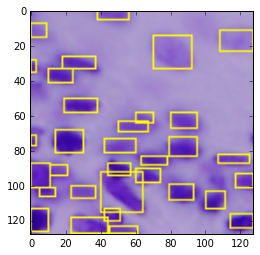

In [115]:
from bbox import generate_anchors, label_anchors

img = np.load('/media/storage/Kaggle/train/data_1/val/039_095.npz')['image']
gt_bboxes = np.load('/media/storage/Kaggle/train/data_1/val/039_095.npz')['bboxes']

anchors, anchor_is_untruncated = generate_anchors((128, 128), (64, 64), 4, (1, 1))
labels, bboxes, classes = label_anchors(anchors, anchor_is_untruncated, gt_bboxes)

# for keep_anchor, (y, x, h, w) in zip(anchor_is_untruncated, anchors):
#     if keep_anchor:
#         img = cv2.rectangle(img, (x, y), (x+w, y+h), (1., 1., 0., 1), 1)
        
for label, (y, x, h, w) in zip(labels, bboxes):
    #if label == 1:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (1., 1., 0., 1), 1)
plt.imshow(img)

In [24]:
gt_bboxes = np.load('/media/storage/Kaggle/train/data_1/val/023_002.npz')['bboxes']
cond_min = np.sqrt(np.product(gt_bboxes[:, 2:], axis=1)) > 36
cond_max = np.sqrt(np.product(gt_bboxes[:, 2:], axis=1)) < 128
gt_bboxes[cond_min & cond_max]

array([], shape=(0, 4), dtype=int64)